11490434/11490434 [==============================] - 0s 0us/step
(28, 28)
784
Epoch 1/10
235/235 [==============================] - 5s 19ms/step - loss: 0.2895 - accuracy: 0.9129 - val_loss: 0.1912 - val_accuracy: 0.9384
Epoch 2/10
235/235 [==============================] - 4s 16ms/step - loss: 0.1007 - accuracy: 0.9688 - val_loss: 0.0868 - val_accuracy: 0.9712
Epoch 3/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0641 - accuracy: 0.9801 - val_loss: 0.0806 - val_accuracy: 0.9757
Epoch 4/10
235/235 [==============================] - 4s 18ms/step - loss: 0.0444 - accuracy: 0.9861 - val_loss: 0.0653 - val_accuracy: 0.9783
Epoch 5/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0317 - accuracy: 0.9901 - val_loss: 0.0727 - val_accuracy: 0.9778
Epoch 6/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0219 - accuracy: 0.9932 - val_loss: 0.0789 - val_accuracy: 0.9780
Epoch 7/10
235/235 [==============================] - 4s 18ms/st

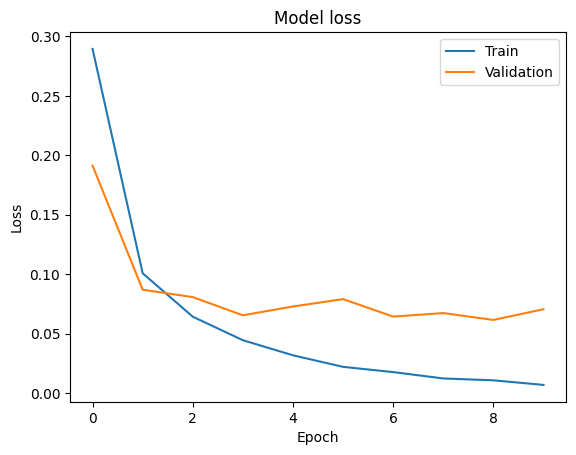

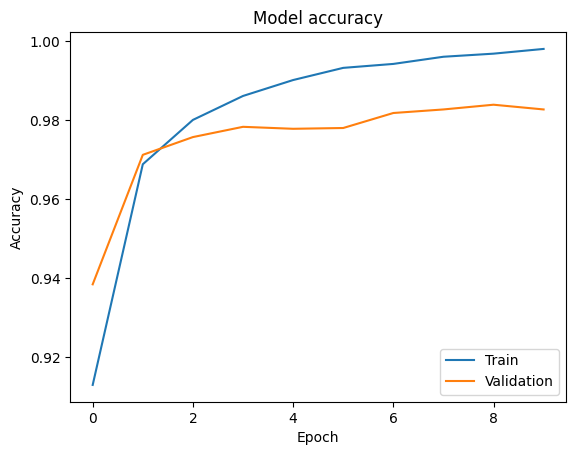

In [6]:
2(1) from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
import matplotlib.pyplot as plt
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()


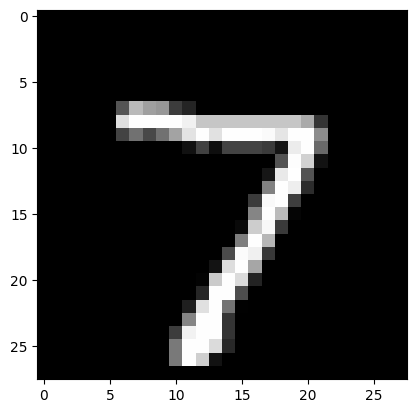

1/1 [==============================] - 0s 123ms/step
Prediction:  7


In [7]:
2(2) # choose an image from the test data
img_index = 0

# plot the image
plt.imshow(test_images[img_index], cmap='gray')
plt.show()

# make a prediction
img = test_data[img_index]
prediction = model.predict(np.array([img]))
print("Prediction: ", np.argmax(prediction))